In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_stn = pd.read_csv('/Users/guoqiang/Github/GMET/test_cases/cali2017/inputs/CALI.screened_stn_list_slope.v3.csv')
df_stn

,stnid,lat,lon,elev,slp_n,slp_e
0,US1CAAL0003,37.7169,-122.0585,163.4,1.953,4.542
1,US1CADN0001,41.8240,-124.1482,19.8,-2.948,15.123
2,US1CAFR0003,36.9897,-119.3971,509.9,-18.502,27.648
3,US1CAHM0001,40.8809,-124.0692,128.0,1.367,13.230
4,US1CAHM0002,40.8248,-124.0382,23.5,1.730,14.267
...,...,...,...,...,...,...
1214,USW00093245,38.3208,-123.0747,19.2,-3.133,2.239
1215,USW00094107,42.5906,-117.8644,1234.4,5.871,0.231
1216,USW00094185,43.5950,-118.9564,1261.9,-3.662,-1.007
1217,USW00094236,42.1469,-121.7242,1244.8,-0.783,-0.337


In [3]:
# default settings
stn_lat_name = 'lat'
stn_lon_name = 'lon'
stnid_name = 'stnid'

grid_lat_name = 'latitude'
grid_lon_name = 'longitude'
grid_mask_name = 'mask'
infile_grid_domain='/Users/guoqiang/Github/GMET/test_cases/cali2017/inputs/CALI.gridinfo.0625_v3.nc'
# read domain information
ds_domain = xr.load_dataset(infile_grid_domain)
# ds_domain = ds_domain.rename({'x':'lon', 'y':'lat'})
lat_grid = ds_domain[grid_lat_name].values
lon_grid = ds_domain[grid_lon_name].values
mask_grid = ds_domain[grid_mask_name].values
ds_domain.coords['y'] = lat_grid[:, 0]
ds_domain.coords['x'] = lon_grid[0, :]

In [4]:
file_allstn = '/Users/guoqiang/Research/PyGMET_testout/stn_info/all_stn.nc'
ds_stn = xr.load_dataset(file_allstn)
ds_stn

<xarray.Dataset>
Dimensions:      (time: 28, stn: 1219)
Coordinates:
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-28
  * stn          (stn) int64 0 1 2 3 4 5 6 ... 1213 1214 1215 1216 1217 1218
Data variables:
    stnid        (stn) |S11 b'US1CAAL0003' b'US1CADN0001' ... b'USW00094299'
    lat          (stn) float64 37.72 41.82 36.99 40.88 ... 43.59 42.15 41.49
    lon          (stn) float64 -122.1 -124.1 -119.4 ... -119.0 -121.7 -120.6
    elev         (stn) float64 163.4 19.8 509.9 ... 1.245e+03 1.334e+03
    slp_n        (stn) float64 1.953 -2.948 -18.5 1.367 ... -3.662 -0.783 2.381
    slp_e        (stn) float64 4.542 15.12 27.65 13.23 ... -1.007 -0.337 3.916
    prcp         (stn, time) float32 0.0 3.602 17.5 2.0 ... 2.0 1.0 1.5 0.0
    tmin         (stn, time) float32 nan nan nan nan ... -9.297 -11.6 -13.2 -8.3
    tmax         (stn, time) float32 nan nan nan nan ... 2.203 2.203 1.703 3.297
    tmean        (stn, time) float32 nan nan nan nan ... -4.699 -5.748 -2.502
    trange       (stn, time) float32 nan nan nan nan nan ... 11.5 13.8 14.9 11.6
    prcp_boxcox  (stn, time) float32 -4.0 1.51 4.181 0.7568 ... 0.0 0.4267 -4.0

In [5]:
ds_near=xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/stn_info/all_stn_nearinfo.nc')
ds_near

<xarray.Dataset>
Dimensions:                   (y: 144, x: 112, near: 35, stn: 1219, param: 1)
Coordinates:
  * y                         (y) float64 34.53 34.59 34.66 ... 43.41 43.47
  * x                         (x) float64 -124.7 -124.7 -124.6 ... -117.8 -117.8
  * near                      (near) int64 0 1 2 3 4 5 6 ... 29 30 31 32 33 34
  * stn                       (stn) int64 0 1 2 3 4 ... 1214 1215 1216 1217 1218
Dimensions without coordinates: param
Data variables: (12/24)
    dx                        (param) float64 0.0625
    dy                        (param) float64 0.0625
    elev                      (y, x) float64 nan nan nan ... 1.387e+03 1.309e+03
    gradient_n_s              (y, x) float64 nan nan nan ... 1.05 1.132 1.336
    gradient_w_e              (y, x) float64 nan nan nan ... -1.855 -2.664 -3.3
    latitude                  (y, x) float64 34.53 34.53 34.53 ... 43.47 43.47
    ...                        ...
    nearIndex_InStn_prcp      (stn, near) int64 1209 491 1158 ... 1217 137 21
    nearDistance_InStn_prcp   (stn, near) float32 8.563 11.37 ... 123.8 125.3
    nearIndex_Grid_tmean      (y, x, near) int64 -99999 -99999 ... 1071 1076
    nearDistance_Grid_tmean   (y, x, near) float32 nan nan nan ... 106.4 108.8
    nearIndex_InStn_tmean     (stn, near) int64 -99999 -99999 ... 1140 894
    nearDistance_InStn_tmean  (stn, near) float32 nan nan nan ... 86.74 87.09
Attributes:
    history:  Wed Aug 21 20:23:50 2019: ncks -d x,4,115 -d y,152,295 WEST.gri...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [6]:
ds_weight=xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/stn_info/all_stn_weight.nc')
ds_weight

<xarray.Dataset>
Dimensions:                 (y: 144, x: 112, near: 35, stn: 1219, param: 1)
Coordinates:
  * y                       (y) float64 34.53 34.59 34.66 ... 43.34 43.41 43.47
  * x                       (x) float64 -124.7 -124.7 -124.6 ... -117.8 -117.8
  * near                    (near) int64 0 1 2 3 4 5 6 ... 28 29 30 31 32 33 34
  * stn                     (stn) int64 0 1 2 3 4 5 ... 1214 1215 1216 1217 1218
Dimensions without coordinates: param
Data variables: (12/20)
    dx                      (param) float64 0.0625
    dy                      (param) float64 0.0625
    elev                    (y, x) float64 nan nan nan ... 1.387e+03 1.309e+03
    gradient_n_s            (y, x) float64 nan nan nan nan ... 1.05 1.132 1.336
    gradient_w_e            (y, x) float64 nan nan nan ... -1.855 -2.664 -3.3
    latitude                (y, x) float64 34.53 34.53 34.53 ... 43.47 43.47
    ...                      ...
    stn_slp_n               (stn) float64 1.953 -2.948 -18.5 ... -0.783 2.381
    stn_slp_e               (stn) float64 4.542 15.12 27.65 ... -0.337 3.916
    nearWeight_Grid_prcp    (y, x, near) float32 nan nan ... 0.000131 7.089e-06
    nearWeight_InStn_prcp   (stn, near) float32 0.9981 0.9956 ... 1.309e-05
    nearWeight_Grid_tmean   (y, x, near) float32 nan nan ... 0.0006889 1.987e-05
    nearWeight_InStn_tmean  (stn, near) float32 nan nan nan ... 0.04191 0.03912
Attributes:
    history:  Wed Aug 21 20:23:50 2019: ncks -d x,4,115 -d y,152,295 WEST.gri...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [7]:
ds_llo = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/leave_one_out_Station_Regression.nc')
ds_llo

<xarray.Dataset>
Dimensions:      (time: 15, stn: 1219)
Coordinates:
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-15
  * stn          (stn) int64 0 1 2 3 4 5 6 ... 1213 1214 1215 1216 1217 1218
Data variables:
    prcp_boxcox  (stn, time) float32 -2.912 0.3988 3.425 ... -3.974 -4.0 -3.558
    pop          (stn, time) float32 0.2628 0.9998 1.0 ... 1.015e-12 0.0 0.04636
    tmean        (stn, time) float32 nan nan nan nan ... 1.447 5.305 5.63 7.166
    trange       (stn, time) float32 nan nan nan nan ... 16.48 14.95 17.21 11.77

In [8]:
ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
ds_grid

<xarray.Dataset>
Dimensions:      (time: 15, x: 112, y: 144)
Coordinates:
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-15
  * x            (x) float64 -124.7 -124.7 -124.6 ... -117.9 -117.8 -117.8
  * y            (y) float64 34.53 34.59 34.66 34.72 ... 43.28 43.34 43.41 43.47
Data variables:
    prcp_boxcox  (y, x, time) float32 nan nan nan nan ... -3.681 -4.0 -1.529
    pop          (y, x, time) float32 nan nan nan nan ... 0.0 0.01992 0.0 0.5295
    tmean        (y, x, time) float32 nan nan nan nan ... -0.8407 -1.186 -0.883
    trange       (y, x, time) float32 nan nan nan nan ... 15.74 16.49 13.17

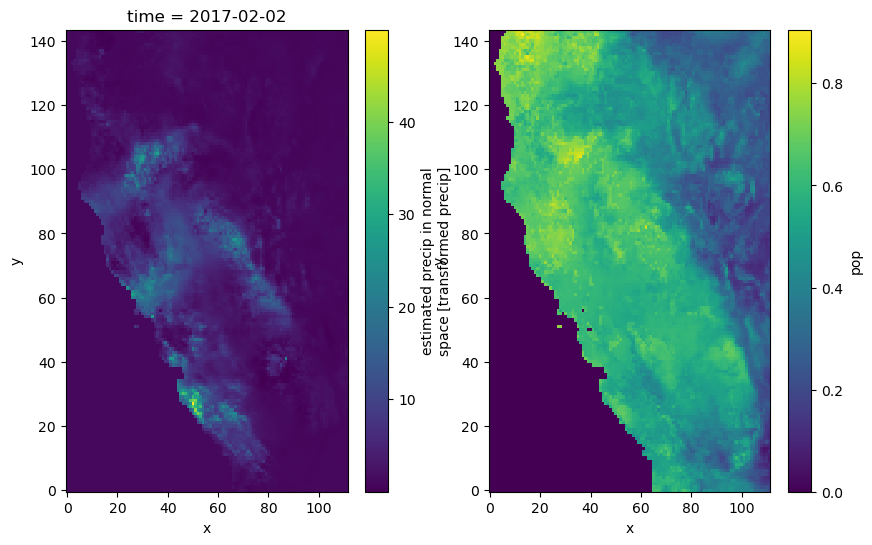

In [9]:
def boxcox_retransform(data, texp=4):
    # transform prcp to approximate normal distribution
    # mode: box-cox; power-law
    if not isinstance(data, np.ndarray):
        data = np.array(data)
    data[data<-texp] = -texp
    datat = (data / texp + 1) ** texp
    return datat

dsexp = xr.load_dataset('/Users/guoqiang/Github/GMET/test_cases/cali2017/outputs/regress_ts.nwp.xv.nc')
dsexp.pcp.values = boxcox_retransform(dsexp.pcp.values)

fig, axs = plt.subplots(1,2,figsize=[10,6])
# dsexp.pcp.mean(dim='time').plot(ax=axs[0], vmin=0, vmax=35)
dsexp.pcp.isel(time=1).plot(ax=axs[0])
dsexp.pop.mean(dim='time').plot(ax=axs[1])

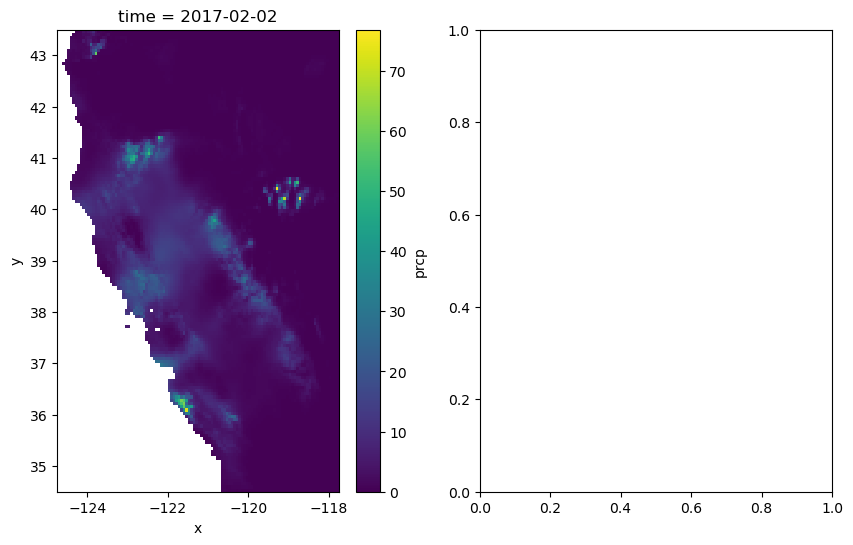

In [10]:
ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
ds_grid['prcp'] = ds_grid.prcp_boxcox.copy()
ds_grid.prcp.values = boxcox_retransform(ds_grid.prcp.values)


fig, axs = plt.subplots(1,2,figsize=[10,6])
# ds_grid.prcp.mean(dim='time').plot(ax=axs[0], vmin=0, vmax=35)
ds_grid.prcp.isel(time=1).plot(ax=axs[0])
# ds_grid.pop.mean(dim='time').plot(ax=axs[1])

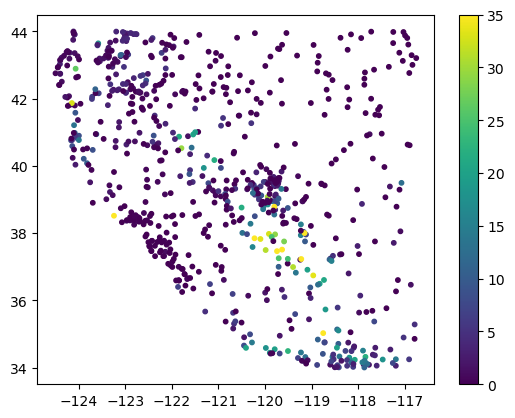

In [11]:
file_allstn = '/Users/guoqiang/Research/PyGMET_testout/stn_info/all_stn.nc'
ds_stn = xr.load_dataset(file_allstn)
plt.scatter(ds_stn.lon.values, ds_stn.lat.values, 10, ds_stn.prcp.isel(time=10).values, vmin=0, vmax=35)
plt.colorbar()

In [12]:
ds_err=xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Error.nc')
ds_err

<xarray.Dataset>
Dimensions:      (time: 15, x: 112, y: 144)
Coordinates:
  * time         (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2017-02-15
  * x            (x) float64 -124.7 -124.7 -124.6 ... -117.9 -117.8 -117.8
  * y            (y) float64 34.53 34.59 34.66 34.72 ... 43.28 43.34 43.41 43.47
Data variables:
    prcp_boxcox  (y, x, time) float32 nan nan nan nan ... 0.9795 1.157 2.102
    tmean        (y, x, time) float32 nan nan nan nan ... 1.682 3.071 1.952
    trange       (y, x, time) float32 nan nan nan nan ... 3.588 4.319 4.244

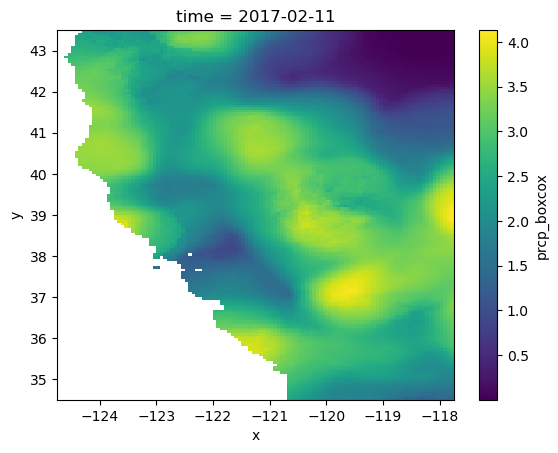

In [13]:
ds_err.prcp_boxcox.isel(time=10).plot()

In [41]:
ds_cc = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/stn_info/stn_time_space_correlation.nc')
ds_cc

<xarray.Dataset>
Dimensions:                    (time: 28, stn: 1219, z: 1, pair: 742371, pind: 2)
Coordinates:
  * time                       (time) datetime64[ns] 2017-02-01 ... 2017-02-28
  * stn                        (stn) int64 0 1 2 3 4 ... 1215 1216 1217 1218
  * z                          (z) int64 0
  * pair                       (pair) int64 0 1 2 3 ... 742368 742369 742370
  * pind                       (pind) int64 0 1
Data variables: (12/17)
    stnid                      (stn) |S11 b'US1CAAL0003' ... b'USW00094299'
    lat                        (stn) float64 37.72 41.82 36.99 ... 42.15 41.49
    lon                        (stn) float64 -122.1 -124.1 ... -121.7 -120.6
    elev                       (stn) float64 163.4 19.8 ... 1.245e+03 1.334e+03
    slp_n                      (stn) float64 1.953 -2.948 -18.5 ... -0.783 2.381
    slp_e                      (stn) float64 4.542 15.12 27.65 ... -0.337 3.916
    ...                         ...
    tmean_space_Clen           (z) float64 1.29e+03
    trange_cc_lag1             (stn) float64 nan nan nan ... 0.2093 0.6721
    trange_cc_lag1_mean        (z) float64 0.4211
    trange_space_Clen          (z) float64 465.3
    prcp_trange_cc_cross       (stn) float64 nan nan nan ... -0.133 -0.5505
    prcp_trange_cc_cross_mean  (z) float64 -0.4022

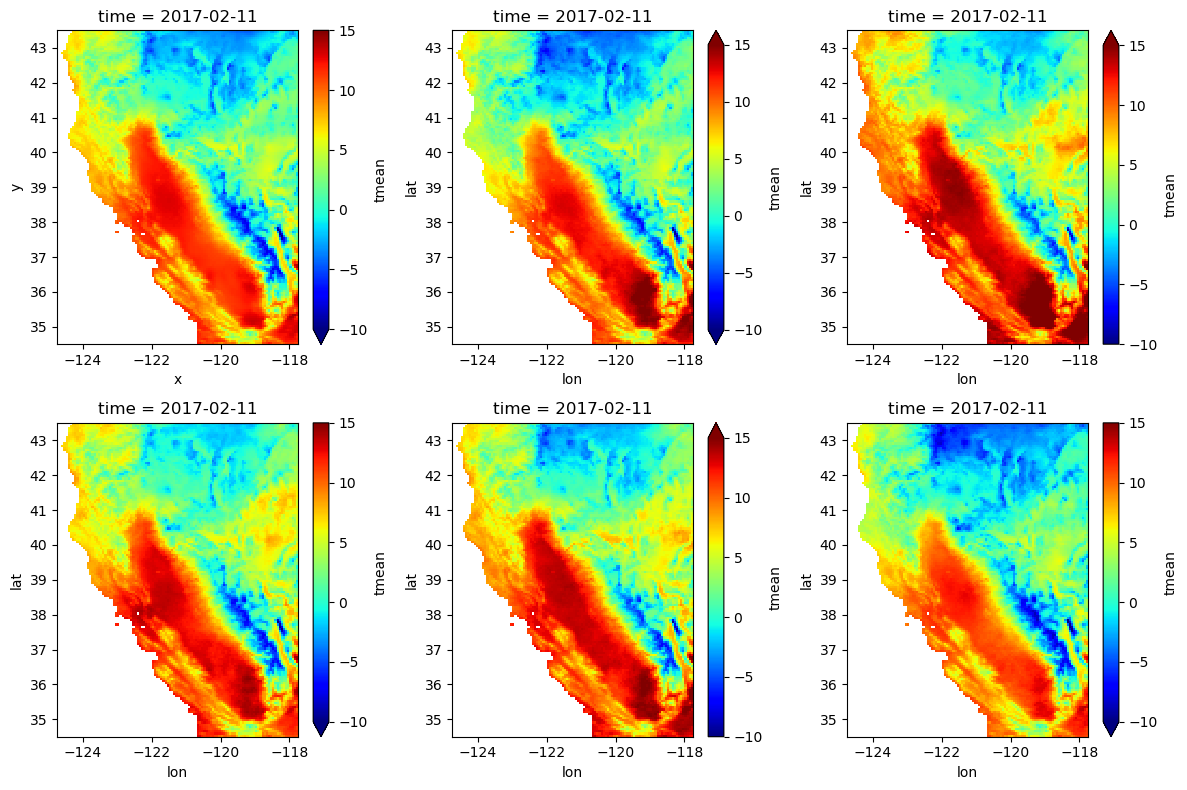

In [68]:

fig, axs = plt.subplots(2, 3, figsize=[12, 8])
axs = axs.flatten()

var = 'tmean'
t = 10
vmin=-10
vmax=15

ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
ds_grid[var].isel(time=t).plot(ax=axs[0], cmap='jet', vmin=vmin, vmax=vmax)

for i in range(5):
    dsi = xr.open_dataset(f'/Users/guoqiang/Research/PyGMET_testout/ensemble_outputs/Ensemble_estimate_00{i+1}.nc')
    dsi[var].isel(time=t).plot(ax=axs[i+1], cmap='jet', vmin=vmin, vmax=vmax)


# var = 'prcp'
# t = 10
# vmin=0
# vmax=20

# # ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
# # ds_grid[var].isel(time=t).plot(ax=axs[0], cmap='jet', vmin=vmin, vmax=vmax)

# for i in range(5):
#     dsi = xr.open_dataset(f'/Users/guoqiang/Research/PyGMET_testout/ensemble_outputs/Ensemble_estimate_00{i+1}.nc')
#     dsi[var].isel(time=t).plot(ax=axs[i+1], cmap='jet', vmin=vmin, vmax=vmax)
    
plt.tight_layout()

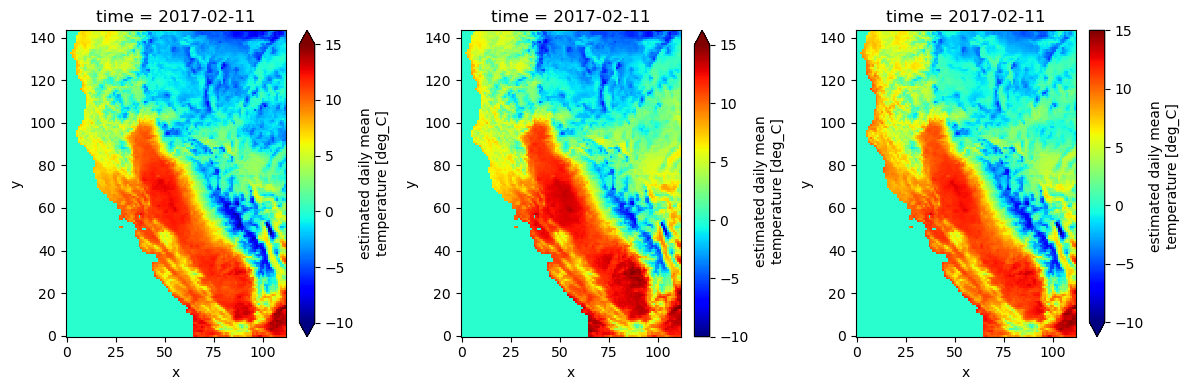

In [65]:
# example outputs

fig, axs = plt.subplots(1, 3, figsize=[12, 4])
axs = axs.flatten()

var = 't_mean'
t = 10
vmin=-10
vmax=15

# ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
# ds_grid[var].isel(time=t).plot(ax=axs[0], cmap='jet', vmin=vmin, vmax=vmax)

for i in range(3):
    dsi = xr.open_dataset(f'/Users/guoqiang/Github/GMET/test_cases/cali2017/outputs/ens_forc.nwp.xv.CALI.00{i+1}.nc')
    dsi[var].isel(time=t).plot(ax=axs[i], cmap='jet', vmin=vmin, vmax=vmax)
    
plt.tight_layout()

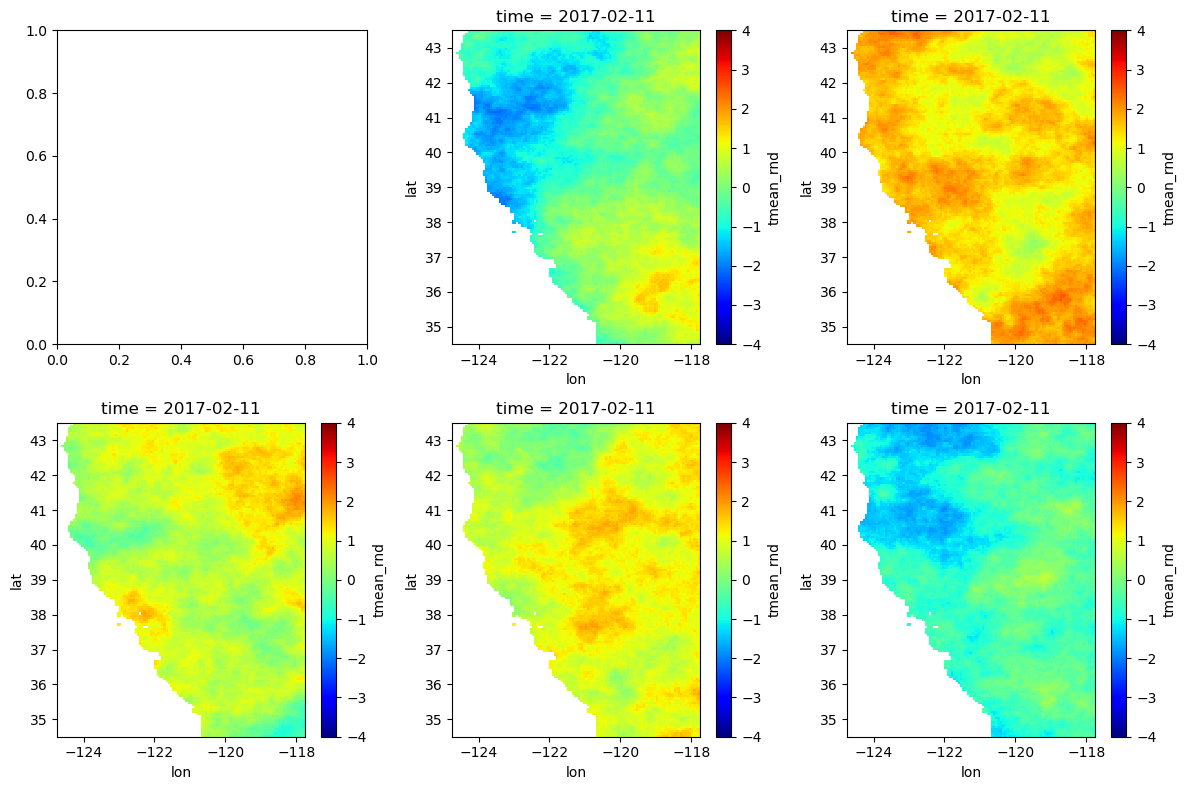

In [67]:

fig, axs = plt.subplots(2, 3, figsize=[12, 8])
axs = axs.flatten()

var = 'tmean'
t = 10
# ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
# ds_grid[var].isel(time=t).plot(ax=axs[0], cmap='jet', vmin=vmin, vmax=vmax)

for i in range(5):
    dsi = xr.open_dataset(f'/Users/guoqiang/Research/PyGMET_testout/ensemble_outputs/Ensemble_estimate_00{i+1}.nc')
    dsi[var+'_rnd'].isel(time=t).plot(ax=axs[i+1], cmap='jet', vmin=-4, vmax=4)
    # axs[i+1].hist(dsi[var+'_rnd'].isel(time=t).values.flatten())

    
plt.tight_layout()

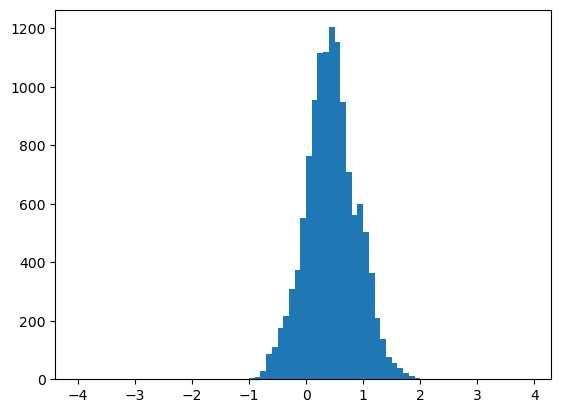

In [48]:
plt.hist(dsi['tmean_rnd'].values[0].flatten(), np.arange(-4, 4, 0.1))
plt.show()


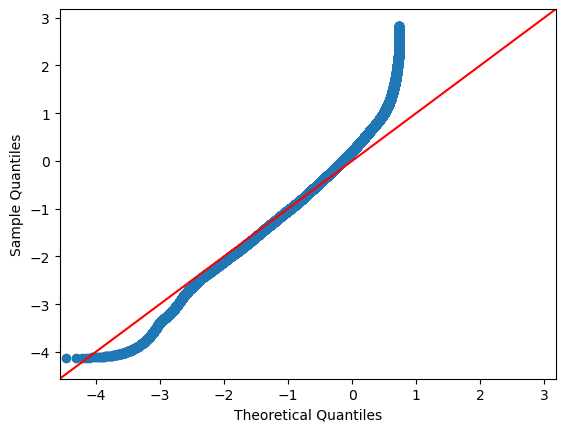

In [18]:
import statsmodels.api as sm
fig = sm.qqplot(dsi['prcp_rnd'].values.flatten(), line='45')

plt.show()

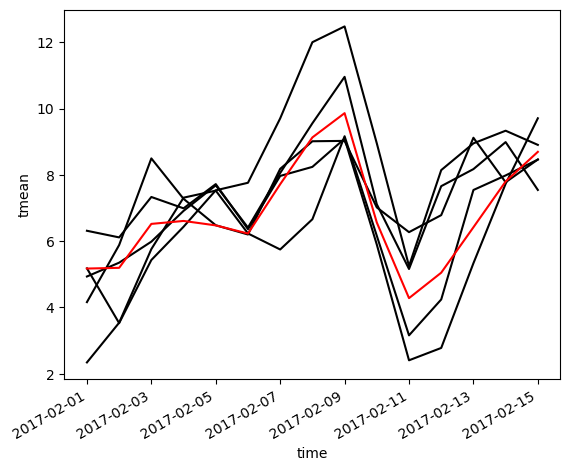

In [19]:

var = 'tmean'



for i in range(5):
    dsi = xr.open_dataset(f'/Users/guoqiang/Research/PyGMET_testout/ensemble_outputs/Ensemble_estimate_00{i+1}.nc')
    dsi[var].mean(dim=['lat','lon']).plot(color='k')
    
    
ds_grid = xr.load_dataset('/Users/guoqiang/Research/PyGMET_testout/regression_outputs/Grid_Regression.nc')
ds_grid[var].mean(dim=['x','y']).plot(color='r')


In [20]:
from scipy.optimize import curve_fit

def func_clen_exp1p(x, a):
    # regression of spatial correlation length
    y = np.exp(-x/a)
    return y


dist_pair = ds_cc.trange_space_pair_dist.values
cc_pair = ds_cc.trange_space_pair_cc.values
index = ~np.isnan(dist_pair + cc_pair)
popt, pcov = curve_fit(func_clen_exp1p, dist_pair[index], cc_pair[index])
popt[0]

AttributeError: 'Dataset' object has no attribute 'trange_space_pair_dist'

In [ ]:
def hist_xy(x, y):
    binnum = 20 # divide x into binnum bins
    smpnum = int(len(x)/binnum) # sample number in each bin
    index = np.argsort(x)
    x = x[index]
    y = y[index]
    x2 = []
    y2 = []

    for i in range(binnum):
        x2.append(np.mean(x[i * smpnum:(i + 1) * smpnum]))
        y2.append(np.mean(y[i * smpnum:(i + 1) * smpnum]))

    return np.array(x2), np.array(y2)

x2,y2=hist_xy(dist_pair[index], cc_pair[index])
plt.plot(x2,y2)

In [ ]:
import gsto